# fItinera Calculator Walkthrough

This notebook walks through theoretical financial planning scenarios to establish a baseline understanding of the `f-Itinera Simulator`'s core functionalities, mechanics, and awesomeness!

## Notebook Setup and Imports

Refer to README.md for basic installation of Jupyter Notebook using uv package manager.

Once you set up above, run the cell below to import the core `fitinera` modules.

In [1]:
from fitinera.core import Age, Month, TimeBounds
from fitinera.assets import AssetBuilder
from fitinera.cashflows import IncomeBuilder, ExpenseBuilder
from fitinera.planning import FinancialScenarioBuilder, RetirementGoal, TimeHorizon
from fitinera.simulation import Simulator
from pprint import pprint

import matplotlib.pyplot as plt


## Scenario 1: Planning in a Vaccum

The goal is to model a simple, best-case scenario, even if it's not entirely realistic. By removing variables like taxes, inflation, and investment growth, we can clearly see the direct impact of income and expenses on wealth accumulation over time. This serves as a foundational example upon which more complex and realistic scenarios can be built.

### Simulation Setup

1.  **Subject**: Starts at age 22 with a life expectancy of 100.
2.  **Income**: A single job earning $100,000 per year.
3.  **Expenses**: Annual living expenses are $50,000.
4.  **Assets**: A single checking account that does not earn interest.
5.  **Goals**: The target retirement age is 61.
6.  **Simplifications**: No taxes, no inflation/raises, and no investment returns.

In [2]:
# 1. Define the simulation's time horizon and retirement goals.
time_horizon = TimeHorizon(
    current_age=Age(22, Month.JANUARY), life_expectancy=Age(100, Month.JANUARY)
)
retirement_goal = RetirementGoal(retirement_age=Age(61, Month.JANUARY))

# 2. Build the financial scenario using a builder pattern.
scenario_builder = FinancialScenarioBuilder(
    name='Vaccuum Retirement Plan', time_horizon=time_horizon
)

scenario = (
    scenario_builder
    # A simple checking account with no growth.
    .with_asset(AssetBuilder('Checking Account').build())
    # An active W2 income stream of $100,000/year.
    .with_income(
        IncomeBuilder('W2 Income', monthly_amount=5_000)
        .with_time_bounds(TimeBounds(end=retirement_goal.retirement_age))
        .build()
    )
    # A recurring expense stream of $50,000/year.
    .with_expense(ExpenseBuilder('Living Expenses', monthly_amount=2_500).build())
    # Set the final retirement goal.
    .with_retirement_goal(retirement_goal)
    .build()
)


### Simulator Execution

The `Simulator` object executes over `FinancialScenario` instances.

Upon execution, it results a `SimulatorResult` instance, which be viewed using the `pprint` function in Python directly.

In [3]:
simulator = Simulator()
results = simulator.run(scenario)
pprint(results)

SimulationResult(status=<SimulationStatus.SUCCESS: 1>,
                 history=[SimulationTurn(current_age=Age(year=22,
                                                         month=<Month.JANUARY: 1>),
                                         net_cash_flow=2500,
                                         current_asset_breakdown={'Checking Account': 0.0},
                                         next_asset_breakdown={'Checking Account': 2500.0},
                                         current_income_breakdown=IncomeBreakdown(active={'W2 Income': 5000},
                                                                                  passive={}),
                                         next_income_breakdown=IncomeBreakdown(active={'W2 Income': 5000.0},
                                                                               passive={}),
                                         total_contributions=2500,
                                         withdrawal_breakdown=defaultdict(<cl

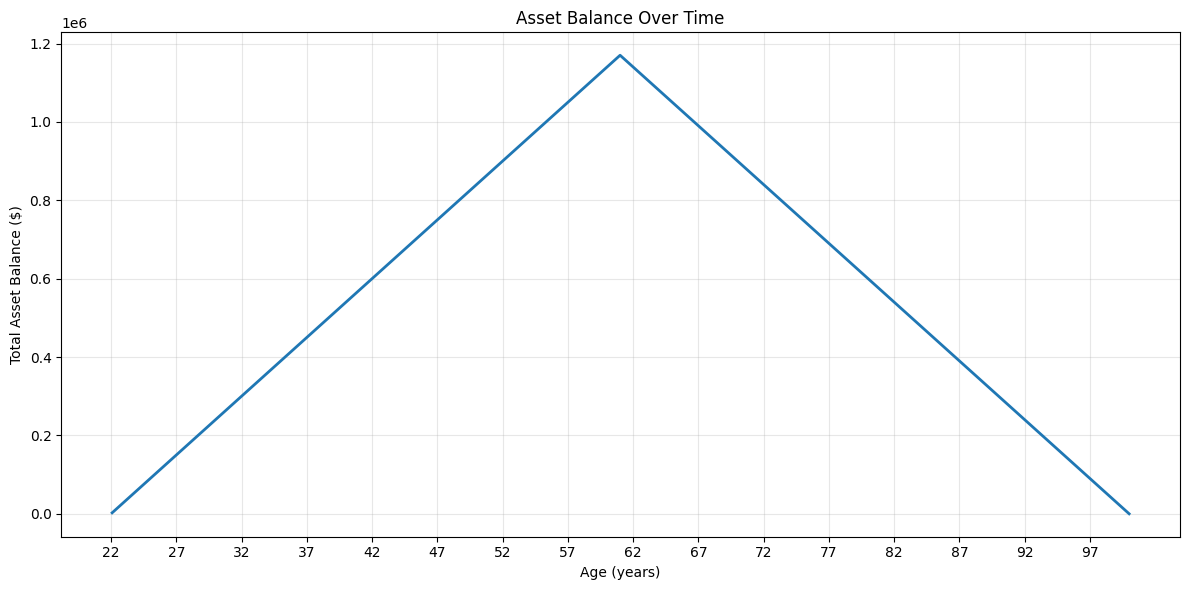

In [5]:
# Extract ages and total asset balances from results
ages = []
balances = []
for turn in results.history:
    flattened_turn_age = turn.current_age.year + turn.current_age.month / 12
    ages.append(flattened_turn_age)
    turn_balance = sum([turn.next_asset_breakdown[asset_class] for asset_class in turn.next_asset_breakdown])
    balances.append(turn_balance)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(ages, balances, linewidth=2)
plt.xlabel('Age (years)')
plt.ylabel('Total Asset Balance ($)')
plt.title('Asset Balance Over Time')
plt.grid(True, alpha=0.3)

# Set x-axis ticks at year marks only
plt.xticks(range(int(min(ages)), int(max(ages)) + 1, 5))

plt.tight_layout()
plt.show()